In [ ]:
# For data manipulation and loading
import os
import pandas as pd
import numpy as np
import re
from collections import Counter

# For text preprocessing and tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Setting random seed for reproducibility
import random

# Ensure NLTK dependencies are downloaded
nltk.download('stopwords')
nltk.download('punkt')

In [14]:
# Load the dataset
data_dir = 'data/enron_spam_data.csv'
email_data = pd.read_csv(data_dir)

# Rename columns
email_data = email_data.rename(columns={'Spam/Ham': 'label', "Message ID" : "mail_id", "Message" : "text", "Subject" : "subject"})

# Drop date
email_data = email_data.drop(columns=['Date'])

# Replace NaN values with empty strings
email_data = email_data.fillna('')

email_data.head()

,mail_id,subject,text,label
0,0,christmas tree farm pictures,,ham
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham


C:\Users\adrin\AppData\Local\Temp\ipykernel_1380\2904055068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=email_data, x='label', palette="viridis")


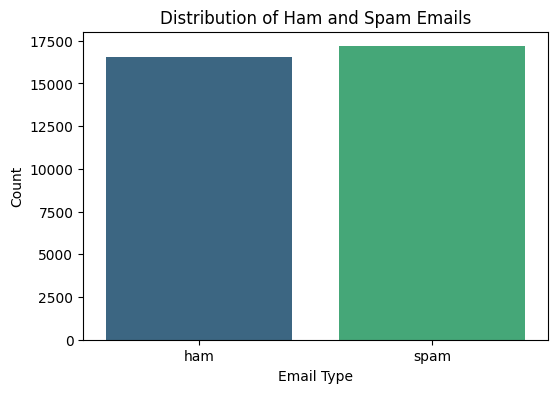

In [15]:
# Count the number of "ham" and "spam" emails
plt.figure(figsize=(6, 4))
sns.countplot(data=email_data, x='label', palette="viridis")
plt.title("Distribution of Ham and Spam Emails")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

C:\Users\adrin\AppData\Local\Temp\ipykernel_1380\3637410047.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Label')


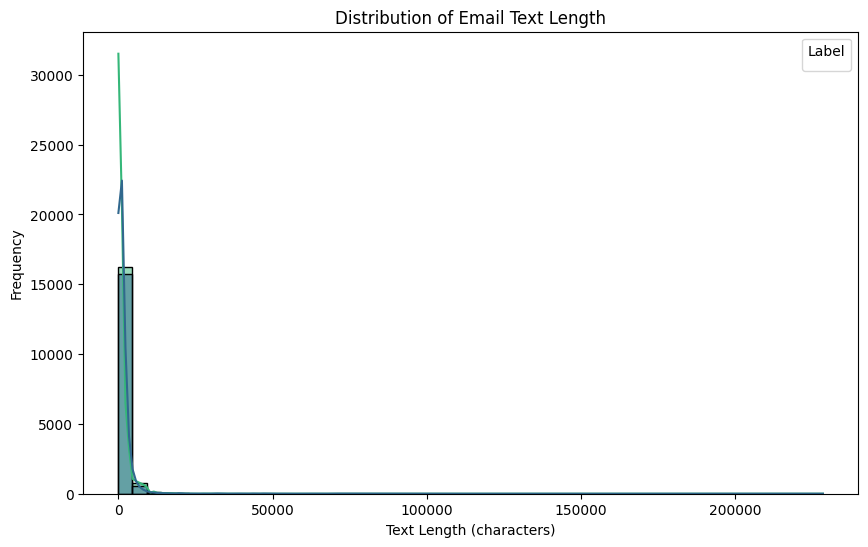

In [16]:
# Calculate the length of each email
email_data['text_length'] = email_data['text'].apply(len)

# Plot distribution of text lengths for ham and spam emails
plt.figure(figsize=(10, 6))
sns.histplot(data=email_data, x='text_length', hue='label', bins=50, kde=True, palette="viridis")
plt.title("Distribution of Email Text Length")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.legend(title='Label')
plt.show()

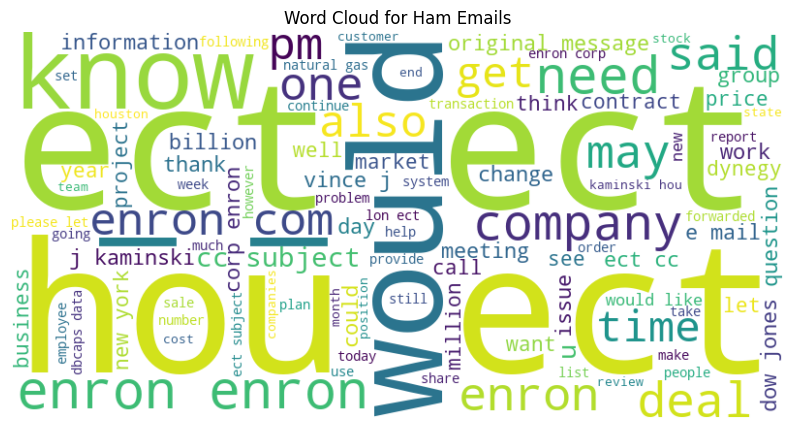

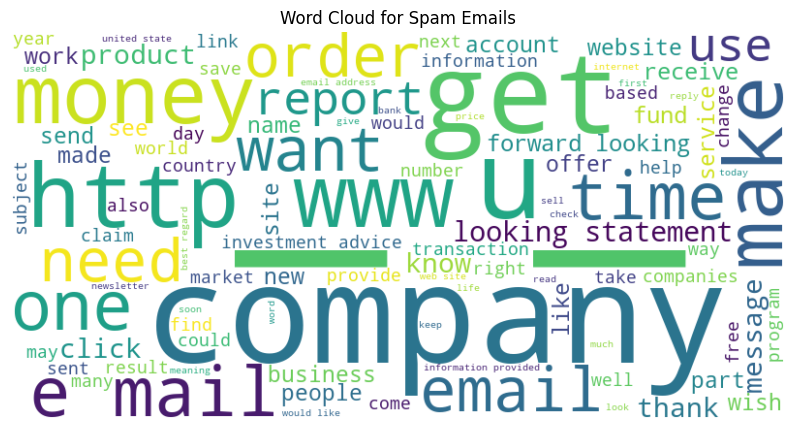

In [18]:
# Get stop words
stop_words = set(stopwords.words('english'))

def generate_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for ham and spam emails separately
generate_wordcloud(email_data[email_data['label'] == 'ham']['text'], 'Word Cloud for Ham Emails')
generate_wordcloud(email_data[email_data['label'] == 'spam']['text'], 'Word Cloud for Spam Emails')

C:\Users\adrin\AppData\Local\Temp\ipykernel_1380\2199543521.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_df, x='count', y='word', ax=axes[0], palette="viridis")
C:\Users\adrin\AppData\Local\Temp\ipykernel_1380\2199543521.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_df, x='count', y='word', ax=axes[1], palette="magma")


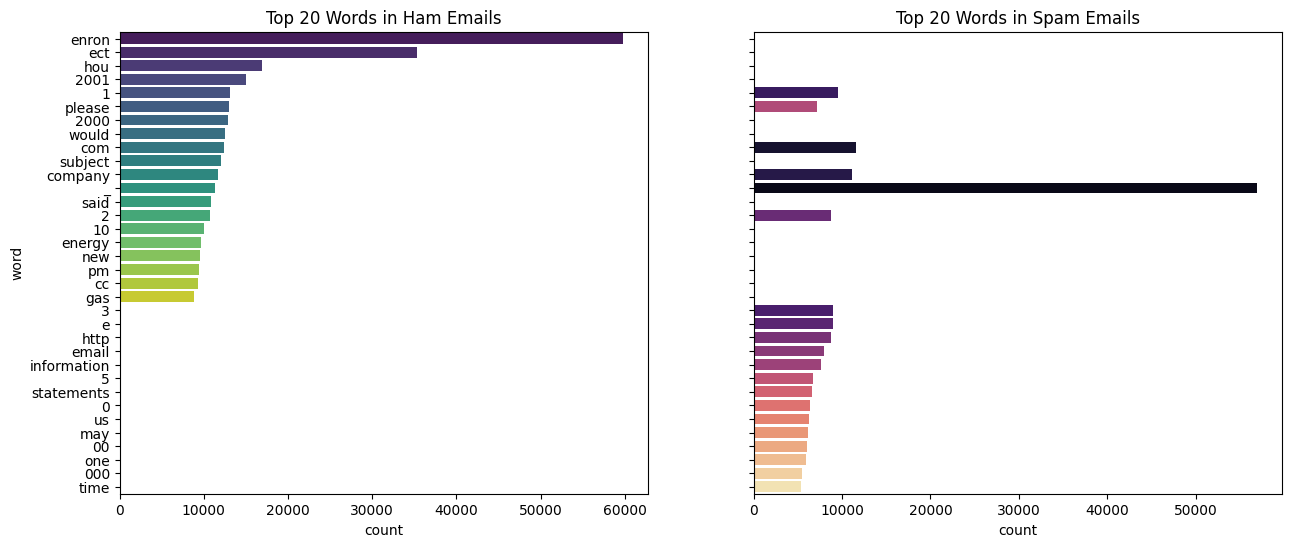

In [19]:
# Helper function to preprocess text
def preprocess_text(text):
    # Remove special characters, make lowercase, and tokenize
    words = re.findall(r'\b\w+\b', text.lower())
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    return words

# Get word frequency for ham and spam emails
ham_words = preprocess_text(' '.join(email_data[email_data['label'] == 'ham']['text']))
spam_words = preprocess_text(' '.join(email_data[email_data['label'] == 'spam']['text']))

# Most common words in ham and spam
ham_common_words = Counter(ham_words).most_common(20)
spam_common_words = Counter(spam_words).most_common(20)

# Convert to DataFrame for visualization
ham_df = pd.DataFrame(ham_common_words, columns=['word', 'count'])
spam_df = pd.DataFrame(spam_common_words, columns=['word', 'count'])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.barplot(data=ham_df, x='count', y='word', ax=axes[0], palette="viridis")
axes[0].set_title("Top 20 Words in Ham Emails")
sns.barplot(data=spam_df, x='count', y='word', ax=axes[1], palette="magma")
axes[1].set_title("Top 20 Words in Spam Emails")
plt.show()